# Supervised Machine Learning Final
## Mushroom Classification

Objective: The goal is to build a supervised classification model to predict whether a mushroom is edible (e) or poisonous (p) based on its physical and chemical attributes. I will do that through testing multiple supervised machine learning appraoches, determining the best one, applynig it and analyzing it. 

Dataset: The dataset is [mushrooms.csv from Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification), containing the following attributes:

Target Variable: class (edible=e, poisonous=p)

Features:

cap-shape,
cap-surface,
cap-color,
bruises,
odor,
gill-attachment,
gill-spacing,
gill-size,
gill-color,	
stalk-shape,	
stalk-root,	
stalk-surface-above-ring,	
stalk-surface-below-ring,	
stalk-color-above-ring,	
stalk-color-below-ring,	
veil-type,	
veil-color,	
ring-number,	
ring-type,	
spore-print-color,	
population,	
habitat

### Import necessary libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV

In [39]:
#Read in the data
data = pd.read_csv('mushrooms.csv')

# Inspect the data
print(data.head())
print(data.info())
print(data.isnull().sum())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

## Exploratory Data Analysis

Plot the distribution of the target variable (class) to check for class imbalance.

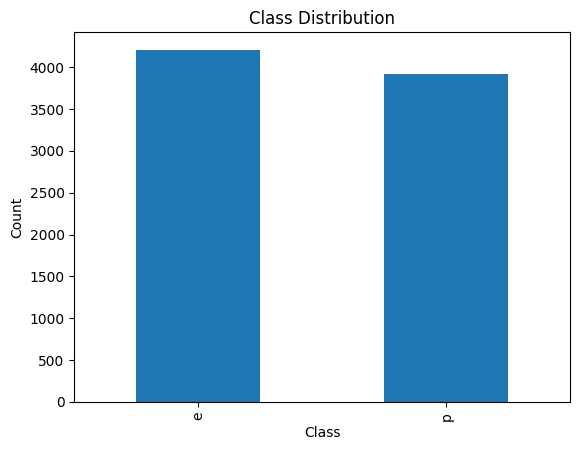

In [40]:
#Class distribution
class_counts = data['class'].value_counts()
class_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

There is a good distribution between the two class variables.

Feature Analysis

Visualize the distribution of each feature using bar plots (since features are categorical).

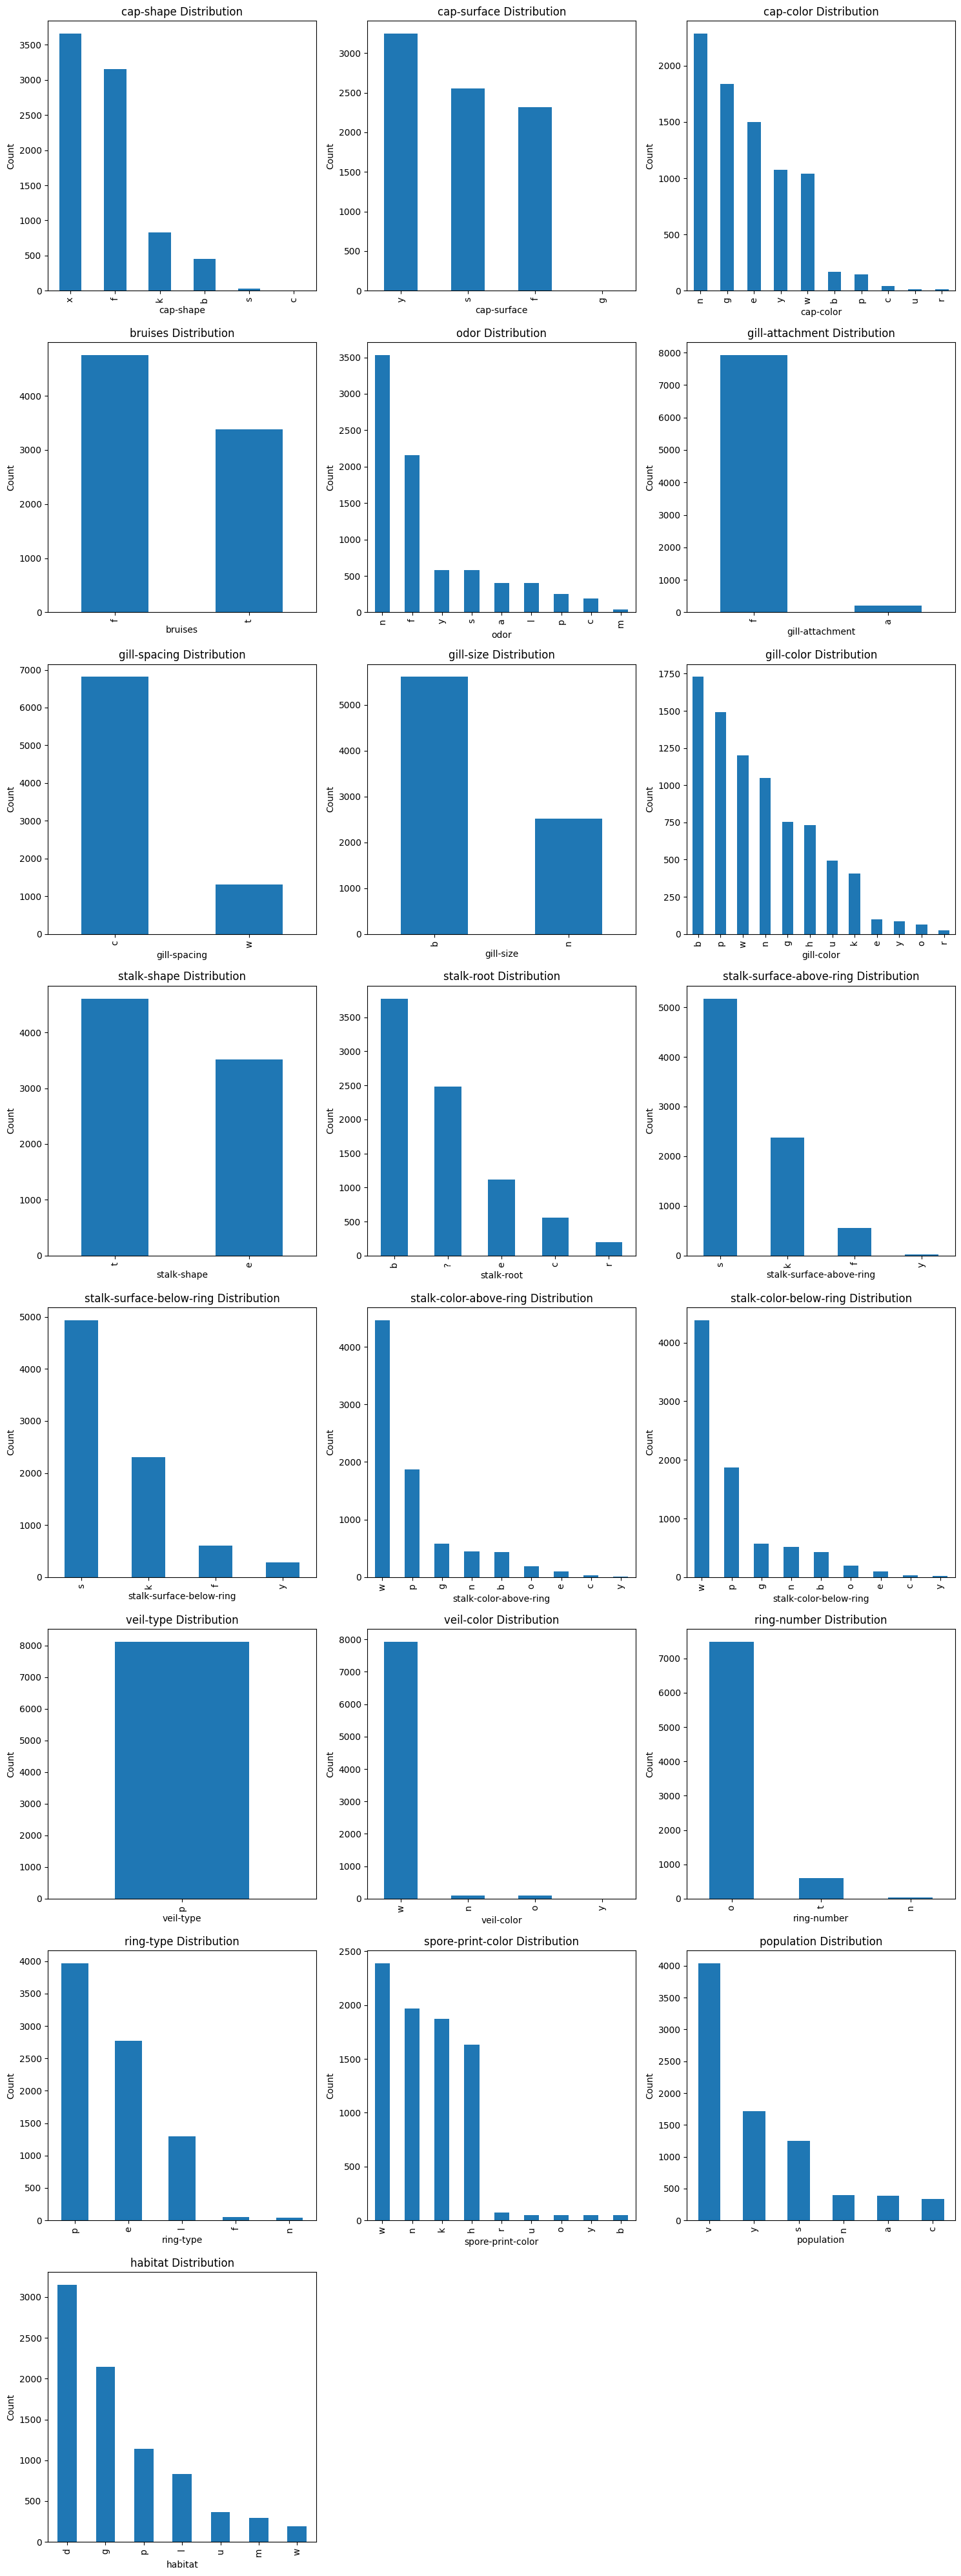

In [8]:
#number of features
num_features = len(data.columns[1:])  
cols = 3  
rows = math.ceil(num_features / cols) 

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, column in enumerate(data.columns[1:]):  
    data[column].value_counts().plot(kind='bar', ax=axes[i], title=f'{column} Distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')


for i in range(len(data.columns[1:]), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [44]:
#Veil type has only one category, this is unhelpful so we will drop it
data = data.drop('veil-type', axis=1)

In [45]:
#Check for missing values
if data.isnull().sum().sum() == 0:
    print("No missing values")

No missing values


There are no null values to handle.

### Feature Encoding

Convert categorical features into numerical representations using label encoding.

In [46]:
#Encode categorical features
encoder = LabelEncoder()
for column in data.columns:
    data[column] = encoder.fit_transform(data[column])

print(data.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-above-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0      

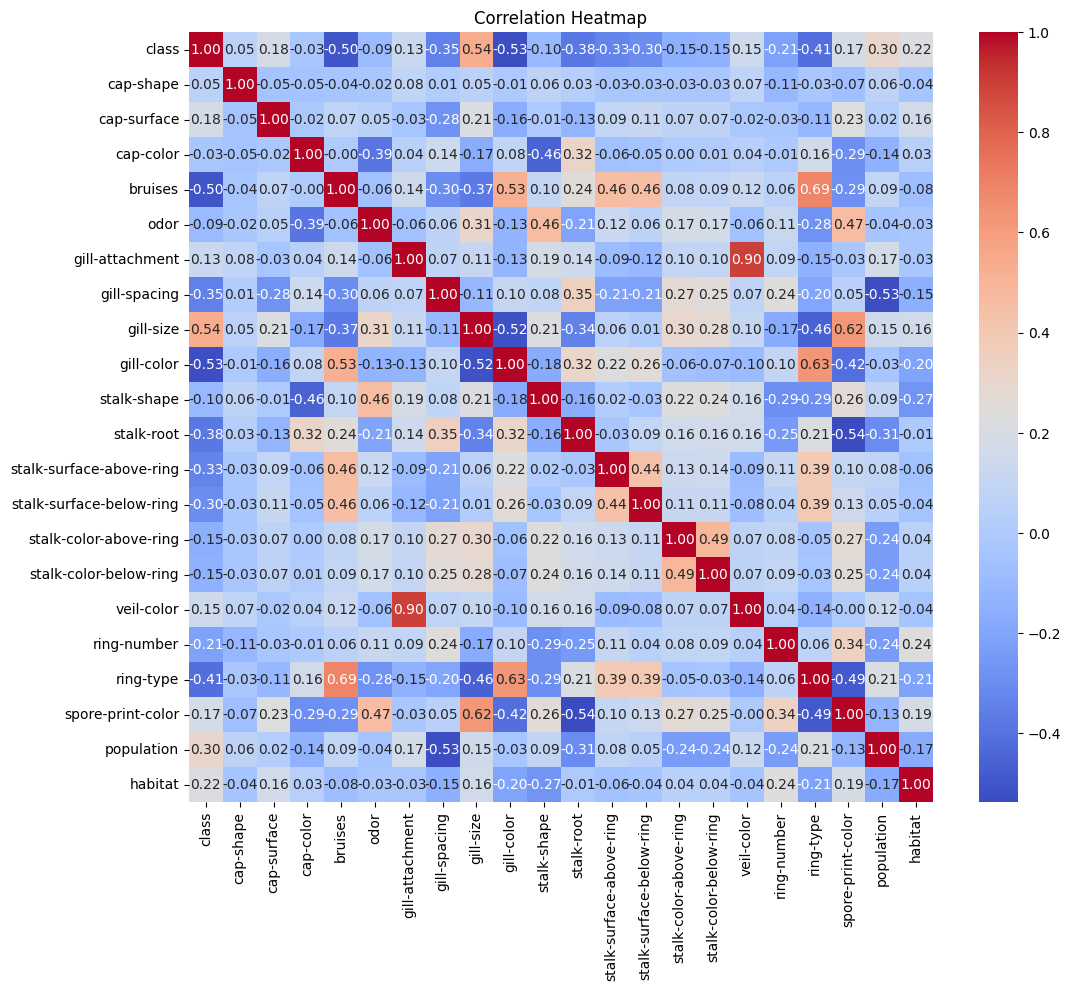

In [47]:
#Visualize the correlation matrix to identify relationships between features.
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Model Building

We will try four seperate models: descision tree, random forest, logistic regression, and k-nearest neighbors to evaluate performance. Then we will select one model to finish the project with based on the model metrics.

We'll start with splitting the dataset into training and testing sets (e.g., 80% train, 20% test).

In [48]:
#split the data
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [58]:
#Train decision tree classifier with regularization
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [57]:
#Evaluation:
print("Accuracy DT:", accuracy_score(y_test, y_pred))
print("Precision DT:", precision_score(y_test, y_pred, average='weighted'))
print("Recall DT:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score DT:", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC DT:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Accuracy DT: 0.9741538461538461
Precision DT: 0.9743568874749426
Recall DT: 0.9741538461538461
F1 Score DT: 0.9741608988449586
ROC-AUC DT: 0.9984049476203912


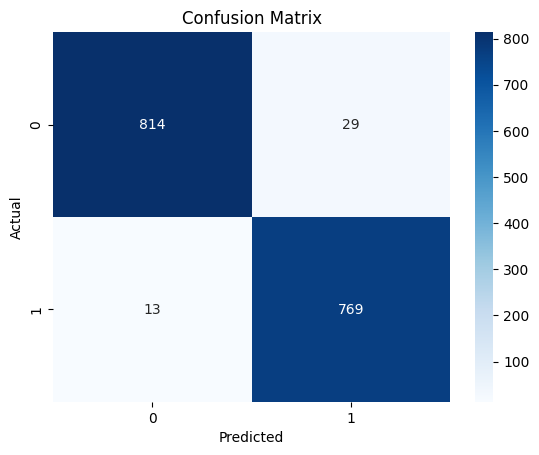

In [56]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest Classifier

In [65]:
#Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)

#Predictions
y_pred_rf = rf_model.predict(X_test)

#Evaluation:
print("Accuracy random forest:", accuracy_score(y_test, y_pred_rf))
print("Precision random forest:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall random forest:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score random forest:", f1_score(y_test, y_pred_rf, average='weighted'))
print("ROC-AUC random forest:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Accuracy random forest: 1.0
Precision random forest: 1.0
Recall random forest: 1.0
F1 Score random forest: 1.0
ROC-AUC random forest: 1.0


In [28]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf_model_regularized, X, y, cv=5)
print("Random Forest CV Accuracy:", rf_cv_scores.mean())

Random Forest CV Accuracy: 0.8452379689276242


### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

#Evaluation:
print("Accuracy logistic regression:", accuracy_score(y_test, y_pred_logistic))
print("Precision logistic regression:", precision_score(y_test, y_pred_logistic, average='weighted'))
print("Recall logistic regression:", recall_score(y_test, y_pred_logistic, average='weighted'))
print("F1 Score logistic regression:", f1_score(y_test, y_pred_logistic, average='weighted'))
print("ROC-AUC logistic regression:", roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1]))

Accuracy logistic regression: 0.9476923076923077
Precision logistic regression: 0.9477056764891159
Recall logistic regression: 0.9476923076923077
F1 Score logistic regression: 0.9476957588253057
ROC-AUC logistic regression: 0.9805802562398934


### KNN Model

In [67]:
#Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)

#Predictions
y_pred_knn = knn_model.predict(X_test)

#Evaluation:
print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print("Precision KNN:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall KNN:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score KNN:", f1_score(y_test, y_pred_knn, average='weighted'))
print("ROC-AUC KNN:", roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1]))

Accuracy KNN: 0.9963076923076923
Precision KNN: 0.9963358063256541
Recall KNN: 0.9963076923076923
F1 Score KNN: 0.9963081542661161
ROC-AUC KNN: 0.9999863476258521


In [70]:
# Cross-validation
cv_dt = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
cv_lr = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
cv_knn = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

#print results
print("Decision Tree CV Accuracy:", cv_dt.mean())
print("Random Forest CV Accuracy:", cv_rf.mean())
print("Logistic Regression CV Accuracy:", cv_lr.mean())
print("KNN CV Accuracy:", cv_knn.mean())

Decision Tree CV Accuracy: 0.8589006441834028
Random Forest CV Accuracy: 0.8714533535430087
Logistic Regression CV Accuracy: 0.8304804092459264
KNN CV Accuracy: 0.8808163698370594


## Results Table and Analysis

| Metric                | Decision Tree  | Random Forest  | Logistic Regression | K-Nearest Neighbors |
|-----------------------|----------------|----------------|----------------------|---------------------|
| **Accuracy**          | 0.9741         | 1.0000         | 0.9477               | 0.9963              |
| **Precision**         | 0.9743         | 1.0000         | 0.9477               | 0.9963              |
| **Recall**            | 0.9741         | 1.0000         | 0.9477               | 0.9963              |
| **F1 Score**          | 0.9742         | 1.0000         | 0.9477               | 0.9963              |
| **ROC-AUC**           | 0.9984         | 1.0000         | 0.9806               | 0.9999              |
| **CV Accuracy**       | 0.8589         | 0.8715         | 0.8305               | 0.8808              |


#### Decision Tree

Cross-validation accuracy (85.89%) is slightly lower than Random Forest and KNN, highlighting potential overfitting to the training data.
Decision Trees are simpler and interpretable, but they may not generalize as well as ensemble methods like Random Forest.

#### Random Forest

Achieved the highest cross-validation accuracy among all models (87.15%), reaffirming its robustness and ability to generalize well. However, the 100% test accuracy indicates likely overfitting.

#### Logistic Regression

Achieved the lowest cross-validation accuracy (83.05%), confirming that linear models struggle to capture the dataset's complexity. Logistic Regression is a simpler model but less suited for highly non-linear problems like this one.

#### K-Nearest Neighbors (KNN)

Achieved the highest cross-validation accuracy (88.08%), slightly outperforming Random Forest.This suggests that KNN generalizes well and will be competitive, particularly with proper scaling and parameter tuning.

#### Moving forward... 

Best Model: KNN achieved the highest cross-validation accuracy and performs competitively in terms of test metrics. We will use KNN from here on out for final analysis.

##### Next Steps:
Perform hyperparameter tuning for KNN to optimize performance.

## KNN Hyperparameter Tuning

In [75]:
#Parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

#Custom scoring function to penalize perfect accuracy
def custom_score(estimator, X, y):
    predictions = estimator.predict(X)
    accuracy = np.mean(predictions == y)
    return accuracy if accuracy < 1.0 else 0.0

#GridSearchCV for tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=custom_score, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

#train final model with best parameters
best_knn = grid_search.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

#evaluate final model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Final KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Final KNN Precision:", precision_score(y_test, y_pred_best_knn, average='weighted'))
print("Final KNN Recall:", recall_score(y_test, y_pred_best_knn, average='weighted'))
print("Final KNN F1 Score:", f1_score(y_test, y_pred_best_knn, average='weighted'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9981536092852489
Final KNN Accuracy: 0.9956923076923077
Final KNN Precision: 0.995730525494784
Final KNN Recall: 0.9956923076923077
Final KNN F1 Score: 0.9956929250112357


Now run KNN with the parameter tuning Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

In [76]:
#Train final KNN model with best parameters
best_knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean', weights='distance')
best_knn.fit(X_train, y_train)

y_pred_best_knn = best_knn.predict(X_test)

#Evaluate:
print("Final KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Final KNN Precision:", precision_score(y_test, y_pred_best_knn, average='weighted'))
print("Final KNN Recall:", recall_score(y_test, y_pred_best_knn, average='weighted'))
print("Final KNN F1 Score:", f1_score(y_test, y_pred_best_knn, average='weighted'))


Final KNN Accuracy: 0.9956923076923077
Final KNN Precision: 0.995730525494784
Final KNN Recall: 0.9956923076923077
Final KNN F1 Score: 0.9956929250112357


In [84]:
#Cross-validation
fcv_knn = cross_val_score(best_knn, X, y, cv=5, scoring='accuracy')

print("Best KNN CV Accuracy:", fcv_knn.mean())

Best KNN CV Accuracy: 0.8884519893899204


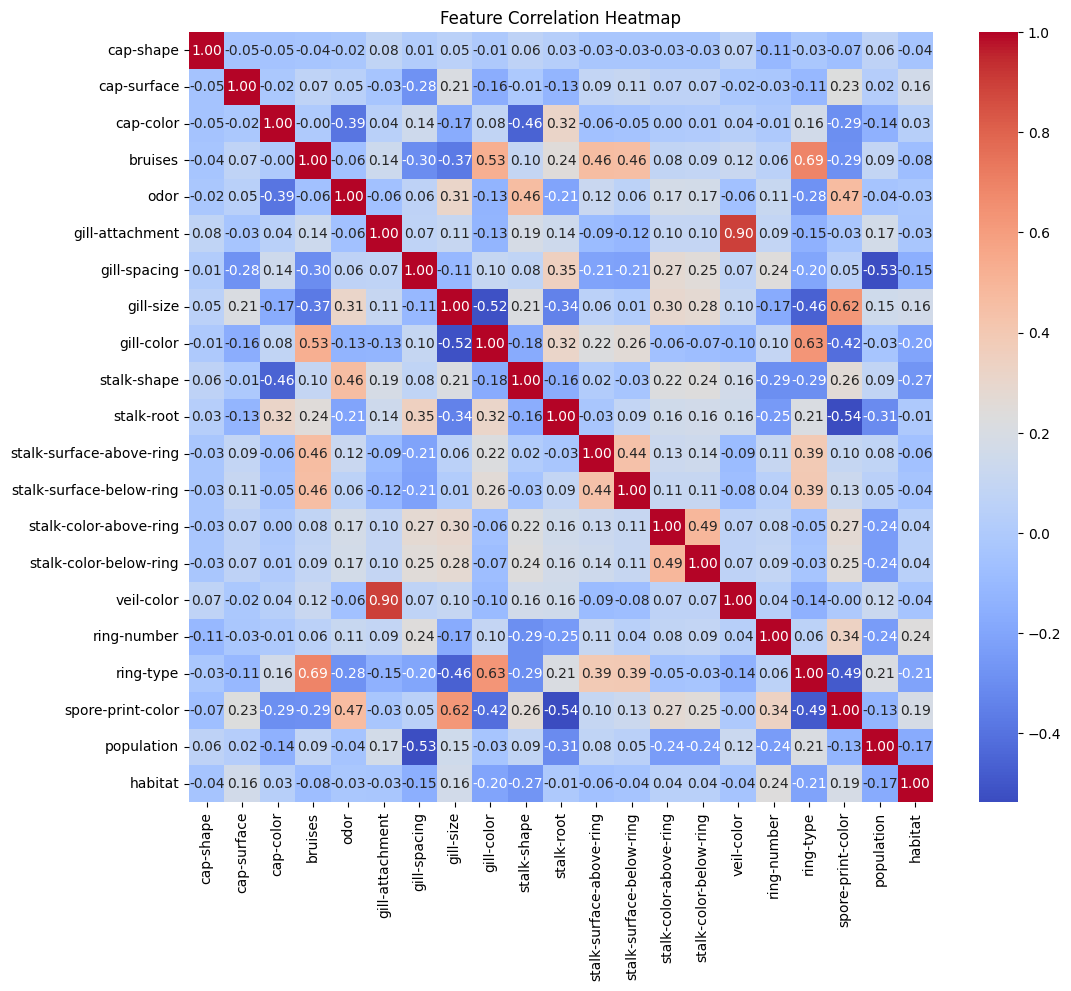

In [77]:
#Compute the correlation matrix
correlation_matrix = X.corr()

#Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


To be able to determind which features were most important for toxicity we need to look at feature importance.

/var/folders/kl/8nm_b54n7917k8b6071ds8500000gn/T/ipykernel_85167/2248156349.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")


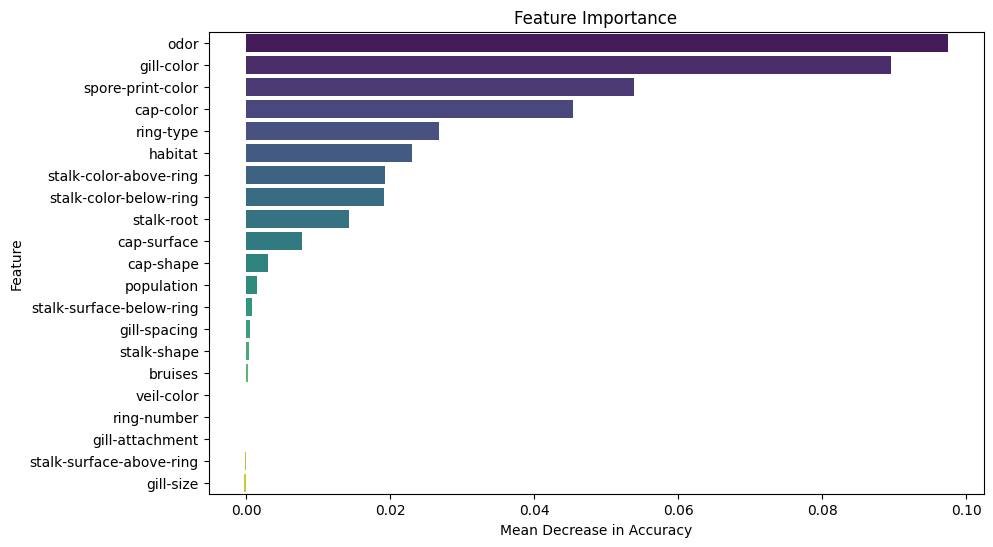

In [85]:
#permutation importance
perm_importance = permutation_importance(best_knn, X_test, y_test, n_repeats=30, random_state=42)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Feature")
plt.show()


## Results & Discussion

In this project I tested four different supervised learning approaches to the mushroom classification problem. Using the model metrics it was determined the the KNN model performed the best. I then fine tuned the parameters for that model to optimize it using a grid search. The final metrics were:
Final KNN Accuracy: 0.9956923076923077
Final KNN Precision: 0.995730525494784
Final KNN Recall: 0.9956923076923077
Final KNN F1 Score: 0.9956929250112357
Cross-validation accuracy: 0.8884519893899204

The metrics show that the model performed extremely well on the test data. However the CV accuracy of ~88% may be a better benchmark as an estimate of generalization. The model may be overfit and thus performing to too well on the test data. To confirm this my next step for a future project would be to run the model on otehr unseen datasets to determine it's accuracy and if it generalizes well.

Based on the results from the feature importance plot above, it indicates that odor, gill-color, spore-print-color,and cap-color account for ~30% of the accuracy. Odor and gill-color definitely contribute the most to the models ability to determine poisonout or edible. This does reflect what you would expect, as odor and color are known to be crucial factors in identifying mushroom toxicity. 

Mid-level factors such as spore-print-color, cap-color, and ring-type also contribute to the model but they may not provide definitive clues about toxicity. 

Lower categories provide less to the model, indicating that they may not be good indicators of toxicity. 